#**Regression**

  Machine Learning Regression is a technique for investigating the relationship between independent variables or features and a dependent variable or outcome. It's used as a method for predictive modelling in machine learning, in which an algorithm is used to predict continuous outcomes.

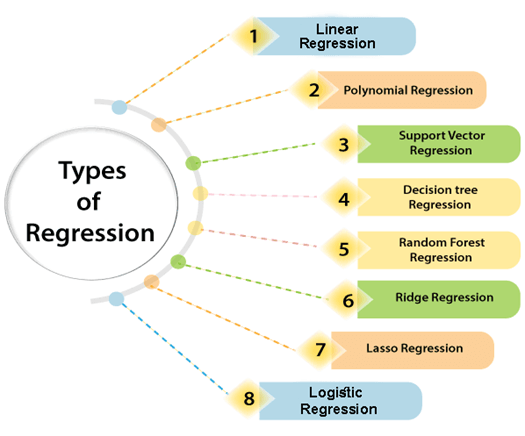

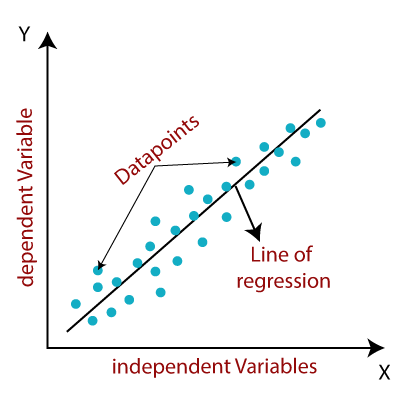

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

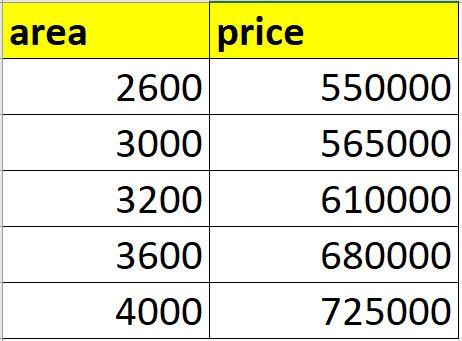

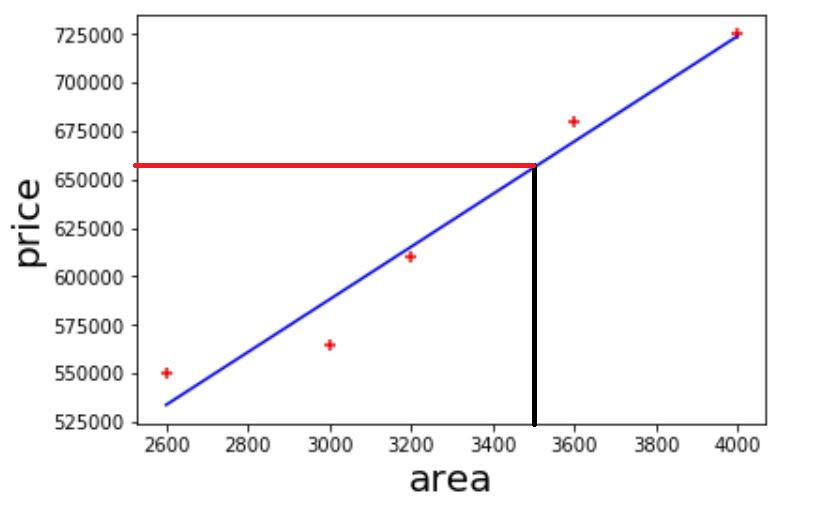

----
**In-Class Assignment 1: homeprices.csv**

----

*In this data analysis assignment, we delve into two distinct datasets, each presenting unique insights and challenges. The first dataset explores the intricate world of housing prices, scrutinizing the relationship between property area and market values. Using linear regression, we create a predictive model to estimate housing prices based on the area, followed by a meticulous verification process.*

In [2]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


Text(0.5, 1.0, 'Housing Price Analysis')

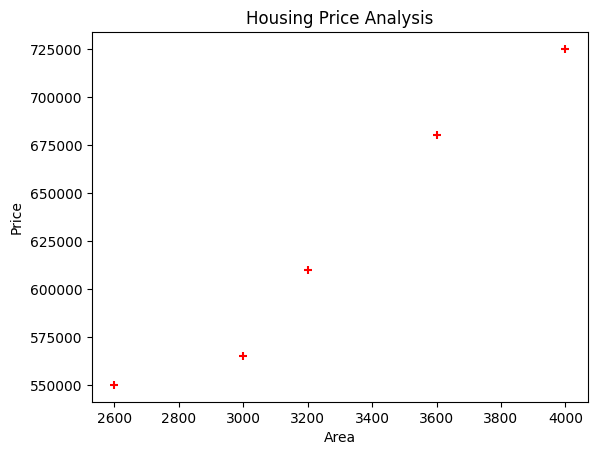

In [3]:
plt.scatter(df.area, df.price,color='red',marker='+')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Housing Price Analysis')

In [4]:
df.area, df.price

(0    2600
 1    3000
 2    3200
 3    3600
 4    4000
 Name: area, dtype: int64,
 0    550000
 1    565000
 2    610000
 3    680000
 4    725000
 Name: price, dtype: int64)

In [5]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [6]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [7]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [8]:
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [9]:
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [10]:
reg.fit(new_df,price)

LinearRegression()

In [11]:
reg.predict([[3300]]) # 628715.75342466

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [12]:
'''
y = mx + c
y = dependent variable
m = slope
x = independent variable
c = intercept
'''

'\ny = mx + c\ny = dependent variable\nm = slope\nx = independent variable\nc = intercept\n'

In [13]:
reg.coef_ # 135.78767123

array([135.78767123])

In [14]:
reg.intercept_ # 180616.43835616432

180616.43835616432

In [15]:
print((135.78767123*3300)+180616.43835616432) # [628715.75342466])
# Matches the prediction value

628715.7534151643


----

**In-Class Assignment 2- Salary_Data.csv**

----
*The second dataset delves into salary data, investigating the correlation between years of professional experience and income. Through comprehensive data analysis, including visualization and linear regression, we construct a model for predicting salaries. This assignment navigates through critical steps, encompassing data loading, visualization, handling of missing values, data splitting, and the application of linear regression models. Ultimately, it offers a holistic approach to understanding and implementing linear regression for predictive modeling and visualizing results in two real-world scenarios: housing prices and salary data.*

In [16]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# Loading the file into the dataframe
path = '/content/Salary_Data.csv'
df = pd.read_csv(path)
print(df.head(5))
print(df.shape)

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
(30, 2)


Plotting in a line chart

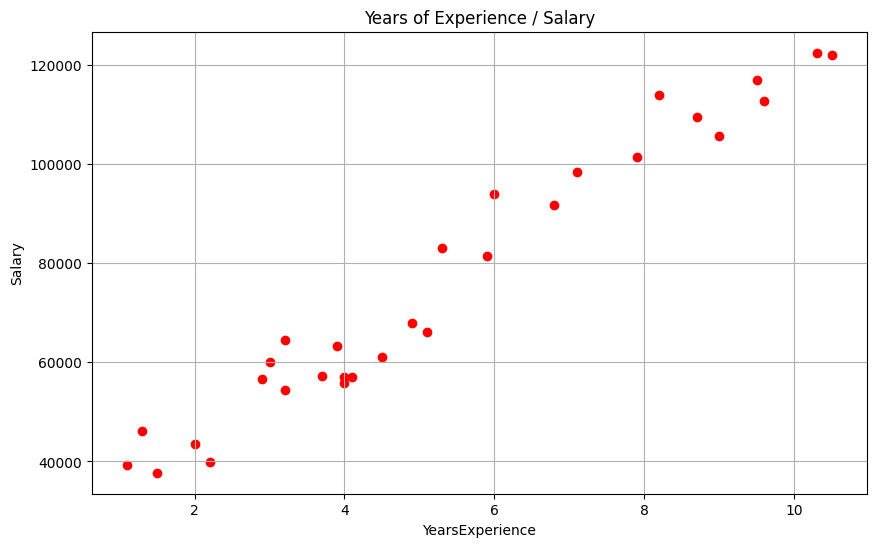

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df['YearsExperience'], df['Salary'], color='red', marker='o')

plt.xlabel('YearsExperience')
plt.ylabel('Salary')


plt.title('Years of Experience / Salary')
plt.grid(True)

plt.show()

#**Manage Missing Values**

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
print(df.isna().sum())
'No Missing Values'

YearsExperience    0
Salary             0
dtype: int64


'No Missing Values'

#**Selecting Independent & Dependendent Values**

In [21]:
yearsOE = df.iloc[0:, 0:1].values  # Independent Variable 'Years Of Experience'
print(yearsOE)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [22]:
salary = df.iloc[0:,1:2].values   # Dependent Variable: 'salary'
print(salary)

[[ 39343.]
 [ 46205.]
 [ 37731.]
 [ 43525.]
 [ 39891.]
 [ 56642.]
 [ 60150.]
 [ 54445.]
 [ 64445.]
 [ 57189.]
 [ 63218.]
 [ 55794.]
 [ 56957.]
 [ 57081.]
 [ 61111.]
 [ 67938.]
 [ 66029.]
 [ 83088.]
 [ 81363.]
 [ 93940.]
 [ 91738.]
 [ 98273.]
 [101302.]
 [113812.]
 [109431.]
 [105582.]
 [116969.]
 [112635.]
 [122391.]
 [121872.]]


#**Encoding Categorial Data: Independent and Dependent Variable**

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [24]:
print(yearsOE.dtype)

float64


Since the datatype of yearsOE(array with independent variables) is of numerical value(float64), we don't need encoding.

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
print(salary.dtype)

float64


Since, the datatype of salary(array with dependent variable) is of numerical format(float64), we don't need encoding.

#**Splitting Data into Training Set and Test Set**

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
YearsOE_train, YearsOE_test, salary_train, salary_test = train_test_split(yearsOE, salary, test_size = 0.2, random_state=1)

In [29]:
print(YearsOE_train, "\n\n", YearsOE_test, "\n\n", salary_train,"\n\n", salary_test)

[[ 9.5]
 [ 2. ]
 [ 8.7]
 [ 7.9]
 [ 8.2]
 [ 2.2]
 [ 1.5]
 [ 9. ]
 [ 3. ]
 [ 5.9]
 [ 4.1]
 [ 3.2]
 [ 9.6]
 [ 1.3]
 [ 5.1]
 [ 1.1]
 [ 4.9]
 [10.5]
 [10.3]
 [ 3.7]
 [ 3.2]
 [ 4. ]
 [ 4. ]
 [ 2.9]] 

 [[5.3]
 [7.1]
 [3.9]
 [6. ]
 [4.5]
 [6.8]] 

 [[116969.]
 [ 43525.]
 [109431.]
 [101302.]
 [113812.]
 [ 39891.]
 [ 37731.]
 [105582.]
 [ 60150.]
 [ 81363.]
 [ 57081.]
 [ 54445.]
 [112635.]
 [ 46205.]
 [ 66029.]
 [ 39343.]
 [ 67938.]
 [121872.]
 [122391.]
 [ 57189.]
 [ 64445.]
 [ 56957.]
 [ 55794.]
 [ 56642.]] 

 [[83088.]
 [98273.]
 [63218.]
 [93940.]
 [61111.]
 [91738.]]


----
#**Feature Selection**



----

#**Prediction with Linear Regresssion**

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
reg_salaryData = LinearRegression()
reg_salaryData.fit(YearsOE_train, salary_train)

LinearRegression()

Prediction of Salary of an employee with 12.5 years of experience

In [32]:
print(reg_salaryData.predict([[12.5]]))     # Prediction: 142271.70722326

[[142271.70722326]]


Manual Data Review using 'coef_' and 'intercept_' function of LinearRegression

In [33]:
print(reg_salaryData.coef_)   # 9332.94473799

[[9332.94473799]]


In [34]:
print(reg_salaryData.intercept_)    # 25609.89799835

[25609.89799835]


Calculating the dependent variable(y) using the linear equation: y = mx+c where m is the intercept, and x is the independent value, and c is the coefficient.

In [35]:
probe_y = 9332.94473799 * 12.5 + 25609.89799835
print(probe_y)                # 142271.70722322498

142271.70722322498


Prediction: 142271.70722326

Manual Calc: 142271.70722322498

*Matches the prediction value.*


#**Data Visualization with Linear Regression Line**

In [36]:
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


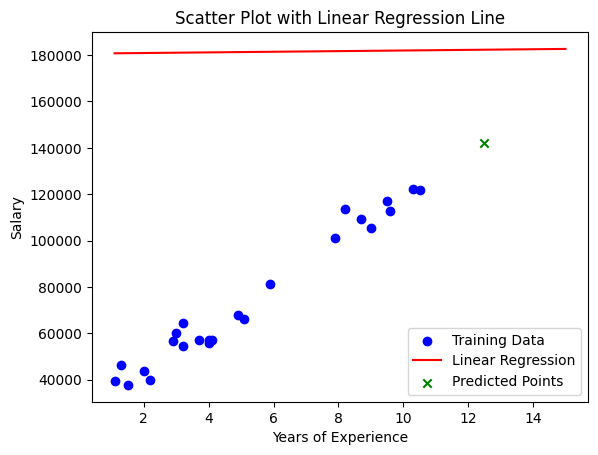

In [37]:
# Predictions
x_values = np.array([[1.1], [15]])
y_pred = reg.predict(x_values)

# Scatter plot
plt.scatter(YearsOE_train, salary_train, label='Training Data', color='blue')
plt.plot(x_values, y_pred, label='Linear Regression', color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.title('Scatter Plot with Linear Regression Line')

# Add the specific points you mentioned
plt.scatter([12.5], [142271.70722326], color='green', marker='x', label='Predicted Points')

plt.legend()
plt.show()


*In both projects, linear regression provides a quantitative model that helps in making predictions based on the identified independent variables. It captures the linear trend in the data and enables the assignment of values to the dependent variable (price in housing analysis, salary in salary data analysis) given specific values of the independent variable (area in housing analysis, years of experience in salary data analysis).*